<a href="https://colab.research.google.com/github/fixxtion/indian-stock-market-predictor/blob/main/notebooks/StockPredictionModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install neuralprophet[live]

     |████████████████████████████████| 61kB 3.0MB/s 
     |████████████████████████████████| 748.8MB 23kB/s 
     |████████████████████████████████| 81kB 4.4MB/s 
ERROR: torchvision 0.9.1+cu101 has requirement torch==1.8.1, but you'll have torch 1.6.0 which is incompatible.
ERROR: torchtext 0.9.1 has requirement torch==1.8.1, but you'll have torch 1.6.0 which is incompatible.
  Found existing installation: torch 1.8.1+cu101
    Uninstalling torch-1.8.1+cu101:
      Successfully uninstalled torch-1.8.1+cu101
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from neuralprophet import NeuralProphet

In [ ]:
stock_names = ['HINDUNILVR', 'ZEEL', 'TATAMOTORS', 'BPCL', 'NIFTY50_all', 'HDFCBANK', 'BRITANNIA', 'BAJAJ-AUTO', 'TITAN', 'KOTAKBANK', 'BAJFINANCE', 'TCS', 'HEROMOTOCO', 'VEDL', 'POWERGRID', 'BAJAJFINSV', 'SBIN', 'SHREECEM', 'GRASIM', 'UPL', 'HINDALCO', 'ADANIPORTS', 'ONGC', 'INDUSINDBK', 'COALINDIA', 'MARUTI', 'MM', 'ITC', 'TECHM', 'TATASTEEL', 'NESTLEIND', 'INFRATEL', 'ULTRACEMCO', 'JSWSTEEL', 'INFY', 'SUNPHARMA', 'NTPC', 'CIPLA', 'HDFC', 'tock_metadata', 'GAIL', 'DRREDDY', 'IOC', 'LT', 'HCLTECH', 'AXISBANK', 'BHARTIARTL', 'RELIANCE', 'ASIANPAINT', 'WIPRO', 'ICICIBANK', 'EICHERMOT']

52


In [48]:
df = pd.read_csv("/content/drive/MyDrive/stock_data/UPL.csv", parse_dates=["Date"])
df = df[["Date", "VWAP"]]
df.rename(columns={"Date": "ds", "VWAP": "y"}, inplace=True)

In [56]:
model = NeuralProphet(
    n_changepoints=30,
    changepoints_range=0.90, 
    epochs=50,
    n_forecasts=2
)


metrics = model.fit(df, validate_each_epoch=True, freq="D")


INFO: nprophet.utils - set_auto_seasonalities: Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 32


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 1.87E-01
Epoch[50/50]: 100%|██████████| 50/50 [00:11<00:00,  4.26it/s, SmoothL1Loss=0.00296, MAE=38.3, RegLoss=0, MAE_val=649, SmoothL1Loss_val=0.398]


In [59]:
future = model.make_future_dataframe(df, periods=365, n_historic_predictions=len(df))
forecast = model.predict(future)
forecast.head()

,ds,y,yhat1,residual1,trend,season_yearly,season_weekly
0,2004-01-23,483.69,497.740540,14.050540,508.441498,-11.380327,0.679396
1,2004-01-27,540.77,499.163025,-41.606975,509.403290,-12.522964,2.282682
2,2004-01-28,542.24,497.728333,-44.511667,509.643768,-12.893305,0.977845
3,2004-01-29,529.23,499.734009,-29.495991,509.884186,-13.290595,3.140422
4,2004-01-30,485.85,497.092957,11.242957,510.124664,-13.711114,0.679396


Text(0.5, 1.0, 'REIANCE')

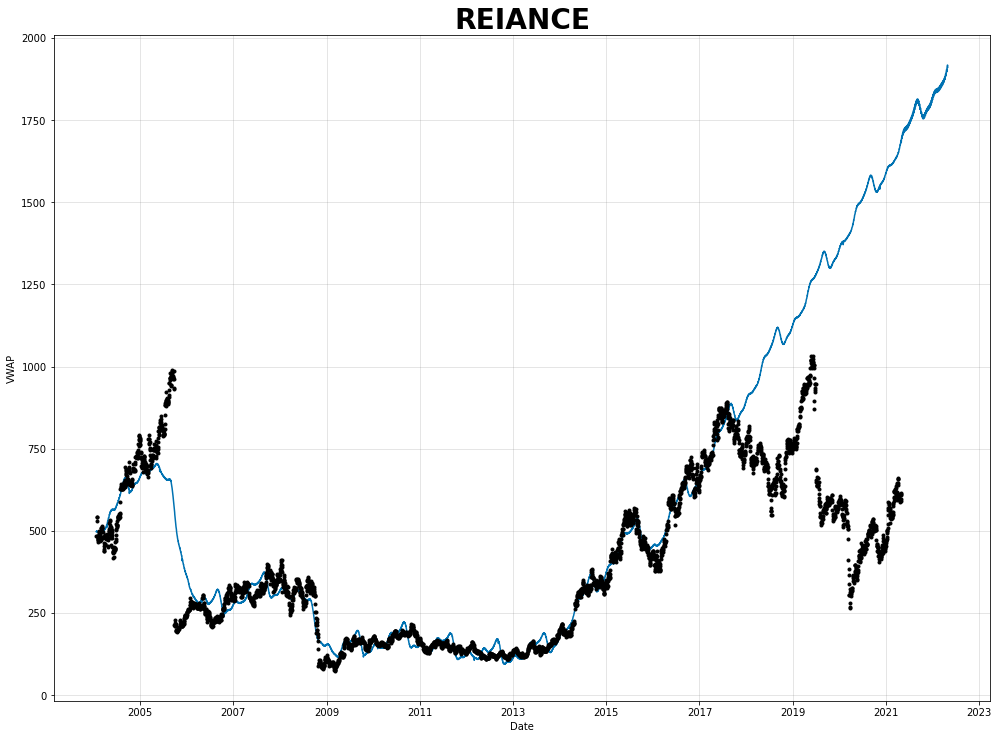

In [61]:
fig, ax = plt.subplots(figsize=(14,10))
n= model.plot(forecast, xlabel="Date", ylabel="VWAP", ax=ax)
n.savefig('plot.png')

ax.set_title("REIANCE", fontsize=28, fontweight="bold")

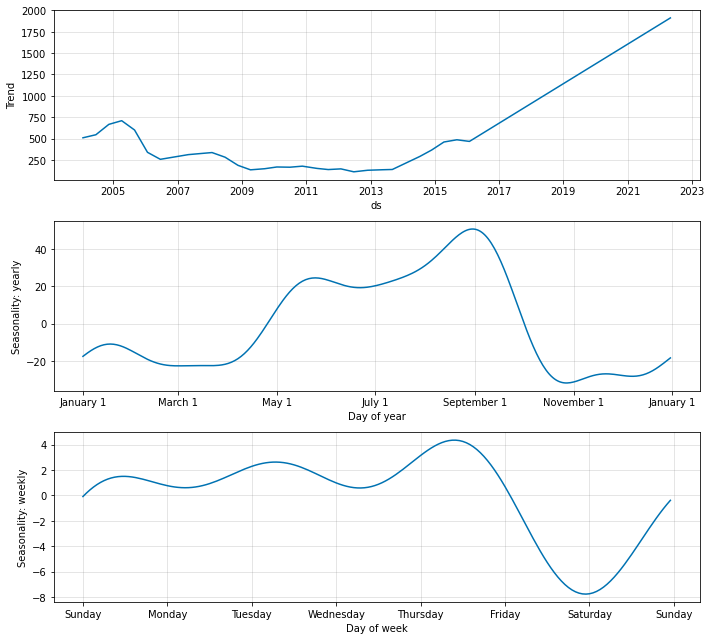

In [60]:
 fig_comp = model.plot_components(forecast)

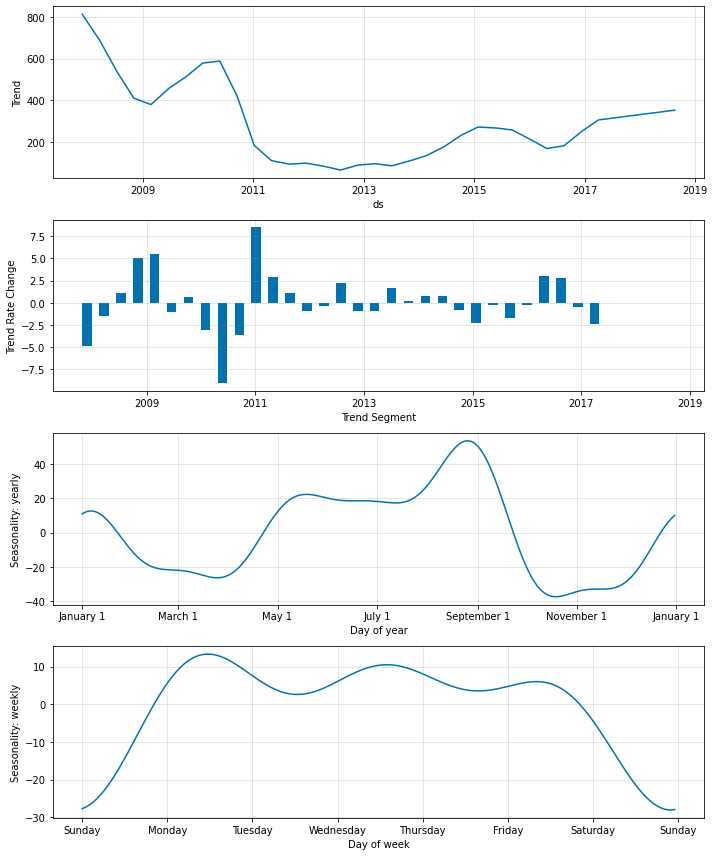

In [ ]:
fig_param = model.plot_parameters()

Text(0.5, 1.0, 'Model Loss (MAE)')

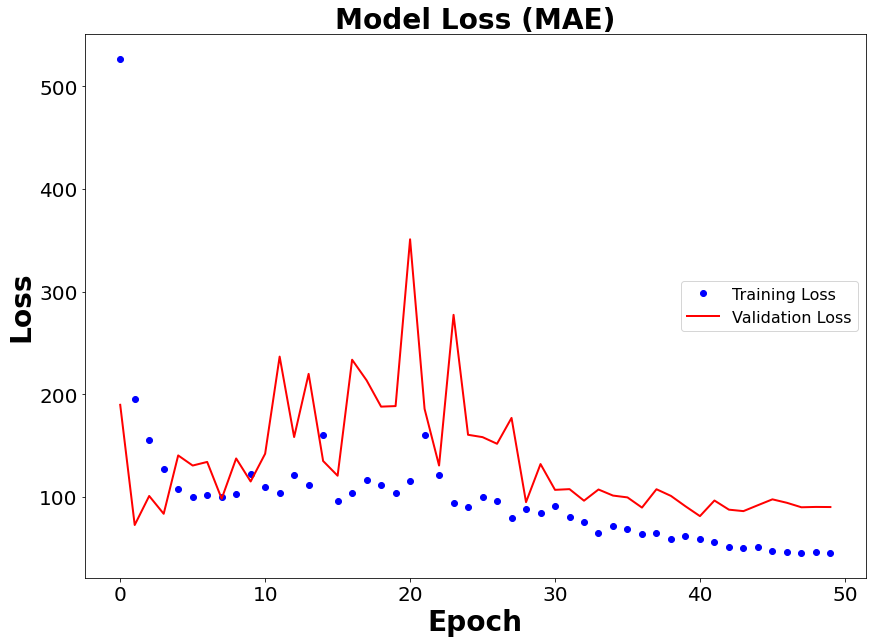

In [ ]:
ig, ax = plt.subplots(figsize=(14, 10))
ax.plot(metrics["MAE"], 'ob', linewidth=6, label="Training Loss")  
ax.plot(metrics["MAE_val"], '-r', linewidth=2, label="Validation Loss")

ax.legend(loc='center right', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_xlabel("Epoch", fontsize=28, fontweight="bold")
ax.set_ylabel("Loss", fontsize=28, fontweight="bold")

ax.set_title("Model Loss (MAE)", fontsize=28, fontweight="bold")